<a href="https://colab.research.google.com/github/zifeng53/Telecome-Customer-Churn-Prediction/blob/master/Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Telecom Customer Churn Prediction


## Group Member: 
#### Andre Lim Tong En (19WMR11731)
#### Liew Zi Feng (19WMR11896)
#### Vikneswari A/P Perumal (19WMR12044)
#### Yong Yung Jun (19WMR11762)

##Business Understanding

Business: Telecommunication Network Provider 

> Objective : 
To retain, sustain clients and prevent customer churn 
 
> Reason : 
1. The cost of retaining existing customers is lower than acquiring new ones. 
2. Existing customers spend more than new customers because they already have rapport with the company ( achievable using marketing strategy ) 

>Factors of Customer Churn

> Voluntary Churn:
1. Switch to Competitor- driven churn due to network performance, monthly charges & technical support
2. Termination of Internet service (DSL & Fiber Optic) 
3. Termination of phone service  

> Involuntary Churn:
1. Not renewing subscription of contract
2. Termination of phone service due to failure of bill payment 

> Business client :
Existing customers who signed up network services with the company. 

> Problem encountered: 
Top 5 aspects of Customer Churn
1. Monthly Charges 
2. Tenure
3. Contract Month-to-month
4. Gender 
5. Tenure Categorized - 0 to 12 months 

> How to improve: 
1. Upgrade network services ( higher speed, larger area coverage, stronger network, secure network) 
2. Competent price
3. Customer support 
4. Analyse customer engagement, usage and behaviour (phone calls, messaging, Internet usage - social media, transaction, movies, browse online)
5. Produce better business insights and strategy 
6. Provide stronger data security

## Importing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
import pylab as pl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve,scorer
import plotly.figure_factory as ff
import plotly.offline as py
import itertools  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


##Data Understanding

Load data from google drive.

Steps ->
1. Create a folder in google drive call 'Dataset'
2. Upload the datasets_Telco-Customer-Churn.csv into the folder
3. Run the code below to connect google colab with drive
4. Enter authentication code
5. Build the Connection
6. Load the csv file 

> Client Background :
1. Customer ID
2. Gender
3. Senior Citizen 
4. Partner 
5. Tenure (monthly) 
6. Phone Service 
7. Multiple Lines 
8. Internet service (DSL / Fiber Optic ) 
9. Online Security
10. Online Backup
11. Device Protection
12. TechSupport
13. StreamingTV
14. Streaming Movies
15. Contract
16. Paperless Billing
17. Payment Method
18. Monthly Charges 
19. Total Charges
20. Churn 

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# load the dataset from local directory
#data = pd.read_csv('datasets_Telco-Customer-Churn.csv') 

# load the dataset from google drive
data = pd.read_csv('/content/gdrive/My Drive/Dataset/datasets_Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In order to balance the data, 3300 rows of data need to be dropped from dataset

In [4]:
deleted_rows = 0

for index,row in data.iterrows():
  if (deleted_rows == 3300):
    break

  if (row['Churn'] == 'No'):
    data = data.drop(index)
    deleted_rows += 1

data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 2 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3743 non-null   object 
 1   gender            3743 non-null   object 
 2   SeniorCitizen     3743 non-null   int64  
 3   Partner           3743 non-null   object 
 4   Dependents        3743 non-null   object 
 5   tenure            3743 non-null   int64  
 6   PhoneService      3743 non-null   object 
 7   MultipleLines     3743 non-null   object 
 8   InternetService   3743 non-null   object 
 9   OnlineSecurity    3743 non-null   object 
 10  OnlineBackup      3743 non-null   object 
 11  DeviceProtection  3743 non-null   object 
 12  TechSupport       3743 non-null   object 
 13  StreamingTV       3743 non-null   object 
 14  StreamingMovies   3743 non-null   object 
 15  Contract          3743 non-null   object 
 16  PaperlessBilling  3743 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,3743.000000,3743.000000,3743.000000
mean,0.194229,28.024846,67.840395
std,0.395659,24.002142,28.883612
min,0.000000,0.000000,18.550000
25%,0.000000,5.000000,45.300000
50%,0.000000,22.000000,74.550000
75%,0.000000,49.000000,91.000000
max,1.000000,72.000000,118.750000


##Data Preparation

### Data Manipulation

In [6]:
#replace 'No internet service' to No for the following columns
replace_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    data[i]  = data[i].replace({'No internet service' : 'No'})

#replace 'No phone service' to No for MultipleLines column
replace_cols = ['MultipleLines']
for i in replace_cols : 
    data[i]  = data[i].replace({'No phone service' : 'No'})

#convert to float type
data["TotalCharges"] = data["TotalCharges"].replace(r'\s+', np.nan, regex = True)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])

#replace values
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_mod(data) :
    
    if data["tenure"] <= 12 :
        return "Tenure 0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "Tenure 12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 48) :
        return "Tenure 24-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60) :
        return "Tenure 48-60"
    elif data["tenure"] > 60 :
        return "Tenure gt>60"
data["tenure_categorized"] = data.apply(lambda data:tenure_mod(data),axis = 1)

#Replacing spaces with null values in total charges column
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

In [7]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          3740 non-null   object 
 1   gender              3740 non-null   object 
 2   SeniorCitizen       3740 non-null   object 
 3   Partner             3740 non-null   object 
 4   Dependents          3740 non-null   object 
 5   tenure              3740 non-null   int64  
 6   PhoneService        3740 non-null   object 
 7   MultipleLines       3740 non-null   object 
 8   InternetService     3740 non-null   object 
 9   OnlineSecurity      3740 non-null   object 
 10  OnlineBackup        3740 non-null   object 
 11  DeviceProtection    3740 non-null   object 
 12  TechSupport         3740 non-null   object 
 13  StreamingTV         3740 non-null   object 
 14  StreamingMovies     3740 non-null   object 
 15  Contract            3740 non-null   object 
 16  Paperl

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
tenure_categorized    0
dtype: int64

### Train Test Split

In [8]:
X = data.iloc[:,1:-2].values
y = data.loc[:,'Churn'].valuesy = data.loc[:,'Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

####Dataframe for Trainning Set

This dataframe will be used for EDA purpose

In [9]:
color_arr = list('rgbkymc')

df_xtrain=pd.DataFrame(X_train)
df_ytrain=pd.DataFrame(y_train)
training_df = pd.concat([df_xtrain,df_ytrain],axis =1)

training_df.columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines',
                                                      'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                                                      'StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']

#Tenure to categorical column
def tenure_mod1(training_df) :
    
    if training_df["tenure"] <= 12 :
        return "Tenure 0-12"
    elif (training_df["tenure"] > 12) & (training_df["tenure"] <= 24 ):
        return "Tenure 12-24"
    elif (training_df["tenure"] > 24) & (training_df["tenure"] <= 48) :
        return "Tenure 24-48"
    elif (training_df["tenure"] > 48) & (training_df["tenure"] <= 60) :
        return "Tenure 48-60"
    elif training_df["tenure"] > 60 :
        return "Tenure gt>60"
training_df["tenure_categorized"] = training_df.apply(lambda training_df:tenure_mod(training_df),axis = 1)

print(training_df)

      gender SeniorCitizen Partner  ... TotalCharges Churn tenure_categorized
0     Female           Yes     Yes  ...      4275.75    No       Tenure 48-60
1       Male            No      No  ...       2979.5   Yes       Tenure 24-48
2     Female            No     Yes  ...       1445.3   Yes       Tenure 24-48
3       Male            No     Yes  ...      2021.35    No       Tenure 48-60
4       Male           Yes     Yes  ...      1772.25   Yes       Tenure 12-24
...      ...           ...     ...  ...          ...   ...                ...
2987  Female           Yes      No  ...       142.35   Yes        Tenure 0-12
2988    Male            No      No  ...      5567.55    No       Tenure gt>60
2989    Male           Yes      No  ...       526.95   Yes        Tenure 0-12
2990  Female            No      No  ...        470.2    No       Tenure 12-24
2991    Male            No     Yes  ...      4953.25    No       Tenure gt>60

[2992 rows x 21 columns]


##Data Exploration



###Gender






Female    0.504011
Male      0.495989
Name: gender, dtype: float64
Churn     No   Yes   All
gender                  
Female   772   736  1508
Male     740   744  1484
All     1512  1480  2992


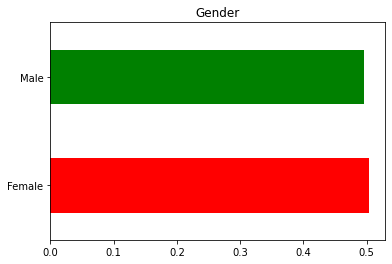

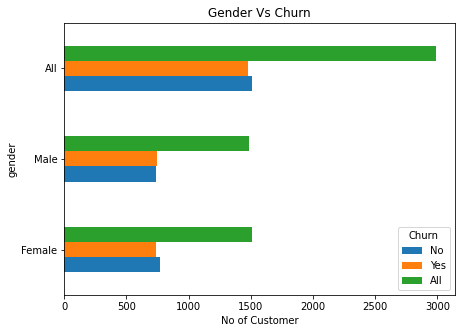

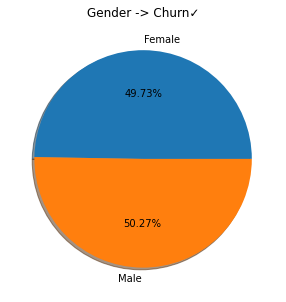

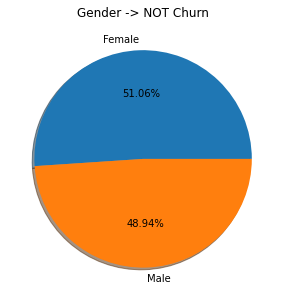

In [ ]:
#Gender
#Create bar char of Gender (no of customer,gender)
training_df.gender.value_counts(normalize=True).plot(kind='barh', color = color_arr)
print(training_df.gender.value_counts(normalize=True))
plt.title("Gender")

#Gender Vs Churn
gender_crosstab = pd.crosstab(training_df.gender, training_df.Churn, margins=True) #create crosstab
print(gender_crosstab)
#Create Bar chart of Gender Vs Churn
gender_crosstab.plot(kind='barh', figsize=(7,5)) 
plt.title("Gender Vs Churn")
plt.xlabel('No of Customer')

#Create Pie Chart for Churn
labels = training_df["gender"].unique().tolist() #get labels from gender cols for pie chart
noOfLabels = len(labels)  #get total length of gender/ y-axis
arr_percent = [None]*noOfLabels #create and define the size of array to store the percentage of Churn value
arr_percentb = [None]*noOfLabels 

for x in range (0,noOfLabels,1): #calculate the percentage of Churn value 
  arr_percent[x] = round((gender_crosstab.iloc[x,1:-1].sum()/gender_crosstab.iloc[noOfLabels,1:-1].sum())*100,2)
  arr_percentb[x] = round((gender_crosstab.iloc[x,0:-2].sum()/gender_crosstab.iloc[noOfLabels,0:-2].sum())*100,2)

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent,labels=labels, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Gender -> Churn\u2713")

#Create Pie Chart for NOT Churn
plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percentb,labels=labels, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Gender -> NOT Churn")
plt.show()

> **=> Gender isn't the important factor of Customer Churn**



###Contract

Churn             No   Yes   All
Contract                        
Month-to-month   655  1312  1967
One year         381   127   508
Two year         476    41   517
All             1512  1480  2992


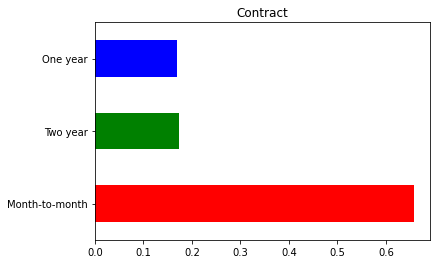

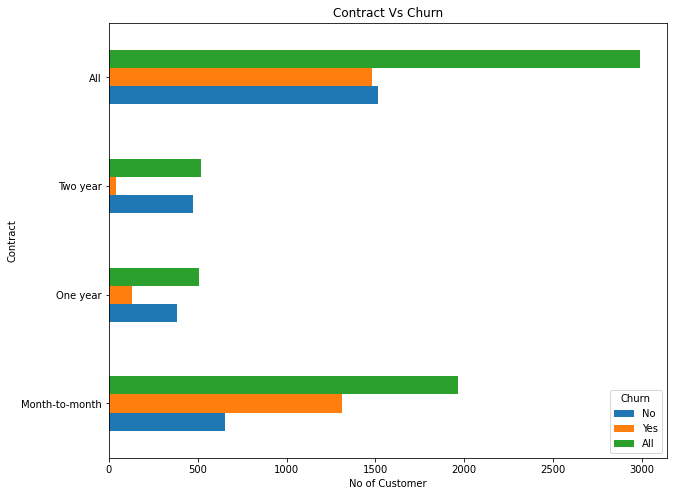

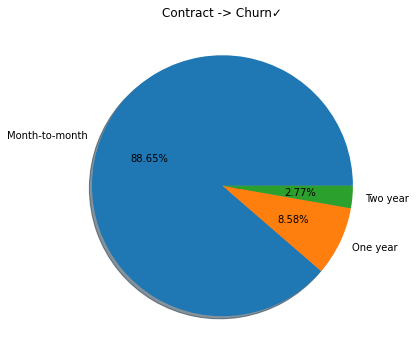

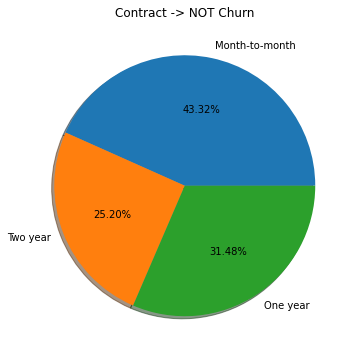

In [ ]:
#Contract
training_df.Contract.value_counts(normalize=True).plot(kind='barh', color = color_arr)
plt.title("Contract")

#Types of Contract Vs Churn
contract_crosstab = pd.crosstab(training_df.Contract, training_df.Churn, margins=True)
print(contract_crosstab)
contract_crosstab.plot(kind='barh', figsize=(10,8))
plt.title("Contract Vs Churn")
plt.xlabel('No of Customer')

# Pie Chart Contract > Churn
percent_monthly = round((contract_crosstab.loc['Month-to-month','Yes'].sum()/contract_crosstab.loc['All','Yes'].sum())*100,2)
percent_one_year = round((contract_crosstab.loc['One year','Yes'].sum()/contract_crosstab.loc['All','Yes'].sum())*100,2)
percent_two_year = round((contract_crosstab.loc['Two year','Yes'].sum()/contract_crosstab.loc['All','Yes'].sum())*100,2)

plt.figure(figsize=(6,6))
labels = training_df["Contract"].unique().tolist()
values = [percent_monthly,percent_one_year,percent_two_year]
plt.pie(values,labels=labels, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Contract -> Churn\u2713")
plt.show()

# Pie Chart Contract > NOT Churn
percent_monthly = round((contract_crosstab.loc['Month-to-month','No'].sum()/contract_crosstab.loc['All','No'].sum())*100,2)
percent_one_year = round((contract_crosstab.loc['One year','No'].sum()/contract_crosstab.loc['All','No'].sum())*100,2)
percent_two_year = round((contract_crosstab.loc['Two year','No'].sum()/contract_crosstab.loc['All','No'].sum())*100,2)

plt.figure(figsize=(6,6))
labels = data["Contract"].unique().tolist()
values = [percent_monthly,percent_one_year,percent_two_year]
plt.pie(values,labels=labels, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Contract -> NOT Churn")
plt.show()

> **Most of the people that left were the ones who had Month-to-Month Contract**

###Tenure

Churn                 No   Yes   All
tenure_categorized                  
Tenure 0-12          321   826  1147
Tenure 12-24         228   233   461
Tenure 24-48         376   253   629
Tenure 48-60         208    92   300
Tenure gt>60         379    76   455
All                 1512  1480  2992


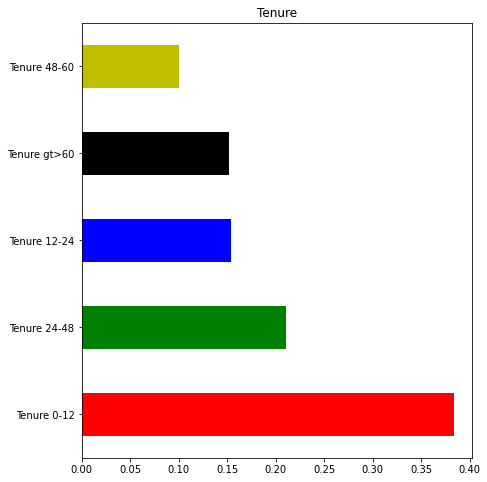

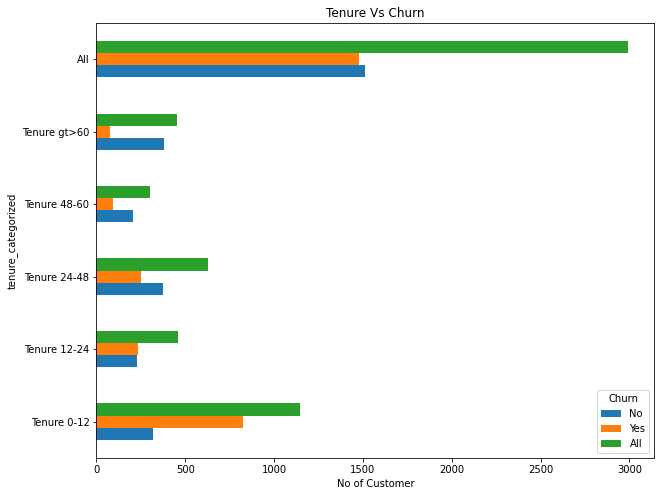

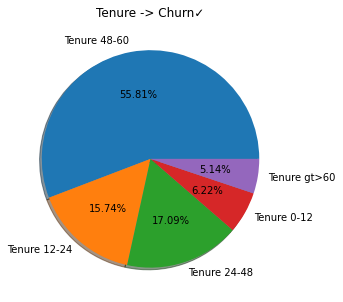

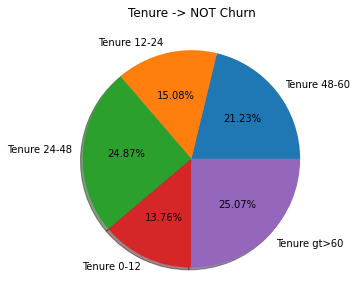

In [ ]:
#Tenure
training_df.tenure_categorized.value_counts(normalize=True).plot(kind='barh',figsize =(7,8), color = color_arr)
plt.title("Tenure")

#Tenure Vs Churn
tenure_crosstab = pd.crosstab(training_df.tenure_categorized, training_df.Churn, margins=True)
print(tenure_crosstab)
tenure_crosstab.plot(kind='barh', figsize=(10,8))
plt.title("Tenure Vs Churn")
plt.xlabel('No of Customer')

#Pie Chart for Tenure > Churn
labels3 = training_df["tenure_categorized"].unique().tolist() 
labels3_order = [0,2,1,4,3]
labels3 = [labels3[i] for i in labels3_order]
noOfLabels3 = len(labels3) 
arr_percent3 = [None]*noOfLabels3 
arr_percent3b = [None]*noOfLabels3 

for x in range (0,noOfLabels3,1): 
  arr_percent3[x] = round((tenure_crosstab.iloc[x,1:-1].sum()/tenure_crosstab.iloc[noOfLabels3,1:-1].sum())*100,2)
  arr_percent3b[x] = round((tenure_crosstab.iloc[x,0:-2].sum()/tenure_crosstab.iloc[noOfLabels3,0:-2].sum())*100,2)

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent3,labels=labels3, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Tenure -> Churn\u2713")

#Pie Chart for Tenure > NOT Churn
plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent3b,labels=labels3, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Tenure -> NOT Churn")
plt.show()

###Payment Method

Churn                        No   Yes   All
PaymentMethod                              
Bank transfer (automatic)   378   201   579
Credit card (automatic)     360   184   544
Electronic check            387   846  1233
Mailed check                387   249   636
All                        1512  1480  2992


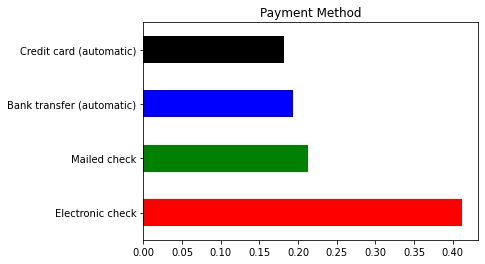

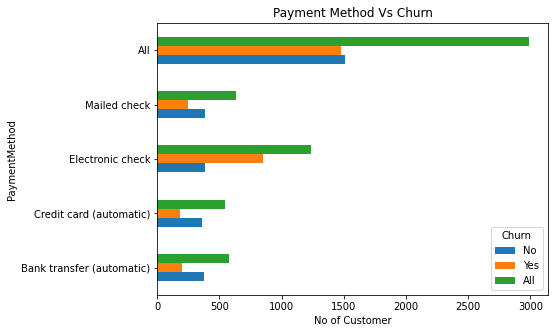

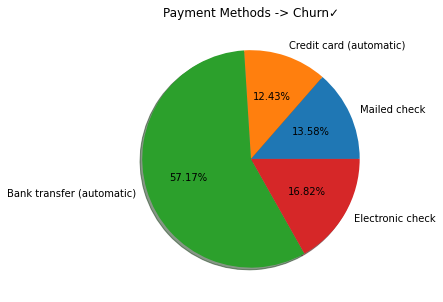

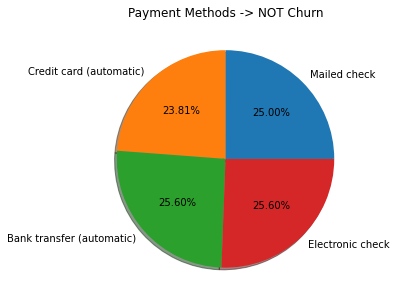

In [ ]:
#Payment Method
training_df.PaymentMethod.value_counts(normalize=True).plot(kind='barh', color = color_arr)
plt.title("Payment Method")

#Payment Method Vs Churn
payment_crosstab = pd.crosstab(training_df.PaymentMethod, training_df.Churn, margins=True) #create crosstab
print(payment_crosstab)

payment_crosstab.plot(kind='barh', figsize=(7,5)) 
plt.title("Payment Method Vs Churn")
plt.xlabel('No of Customer')

#Create Pie Chart
labels4 = training_df["PaymentMethod"].unique().tolist() 
labels4_order = [2,3,0,1]
labels4 = [labels4[i] for i in labels4_order]
noOfLabels4 = len(labels4) 
arr_percent4 = [None]*noOfLabels4 
arr_percent4b = [None]*noOfLabels4 

for x in range (0,noOfLabels4,1): 
  arr_percent4[x] = round((payment_crosstab.iloc[x,1:-1].sum()/payment_crosstab.iloc[noOfLabels4,1:-1].sum())*100,2)
  arr_percent4b[x] = round((payment_crosstab.iloc[x,0:-2].sum()/payment_crosstab.iloc[noOfLabels4,0:-2].sum())*100,2)

# Churn
plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent4,labels=labels4, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Payment Methods -> Churn\u2713")

# NOT Churn
plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent4b,labels=labels4, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Payment Methods -> NOT Churn")
plt.show()

###Senior Citizen

Churn            No   Yes   All
SeniorCitizen                  
No             1314  1102  2416
Yes             198   378   576
All            1512  1480  2992


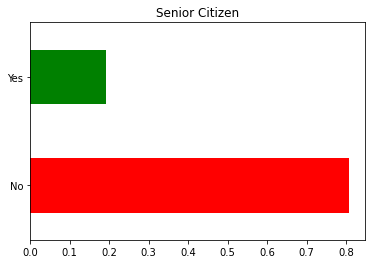

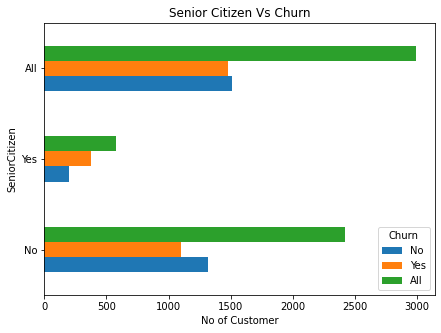

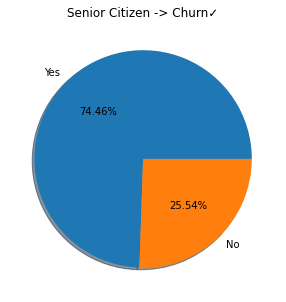

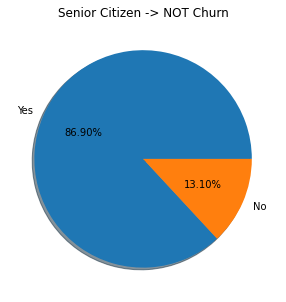

In [ ]:
training_df.SeniorCitizen.value_counts(normalize=True).plot(kind='barh', color = color_arr)
plt.title("Senior Citizen")

#Senior Citizen Vs Churn
senior_citizen_crosstab = pd.crosstab(training_df.SeniorCitizen, training_df.Churn, margins=True) #create crosstab
print(senior_citizen_crosstab)

senior_citizen_crosstab.plot(kind='barh', figsize=(7,5)) 
plt.title("Senior Citizen Vs Churn")
plt.xlabel('No of Customer')

#Create Pie Chart
labels11 = training_df["SeniorCitizen"].unique().tolist() 
noOfLabels11 = len(labels11) 
arr_percent11 = [None]*noOfLabels11
arr_percent11b = [None]*noOfLabels11

for x in range (0,noOfLabels11,1): 
  arr_percent11[x] = round((senior_citizen_crosstab.iloc[x,1:-1].sum()/senior_citizen_crosstab.iloc[noOfLabels11,1:-1].sum())*100,2)
  arr_percent11b[x] = round((senior_citizen_crosstab.iloc[x,0:-2].sum()/senior_citizen_crosstab.iloc[noOfLabels11,0:-2].sum())*100,2)

# Churn
plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent11,labels=labels11, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Senior Citizen -> Churn\u2713")

# NOT Churn
plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent11b,labels=labels11, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Senior Citizen -> NOT Churn")
plt.show()

###Partner & Dependents

Dependents    No  Yes   All
Partner                    
No          1508  158  1666
Yes          704  622  1326
All         2212  780  2992


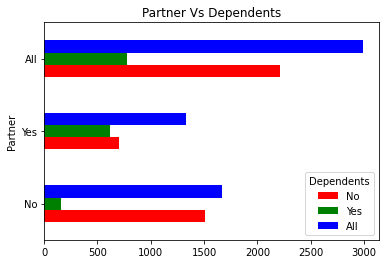

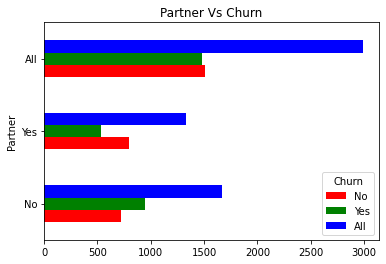

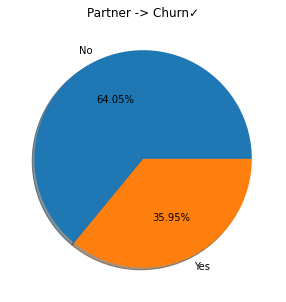

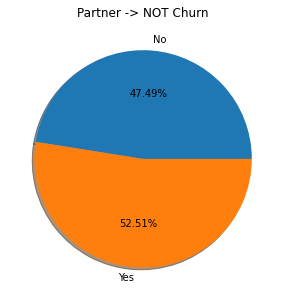

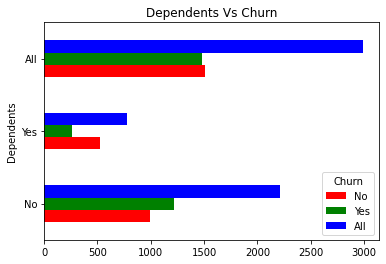

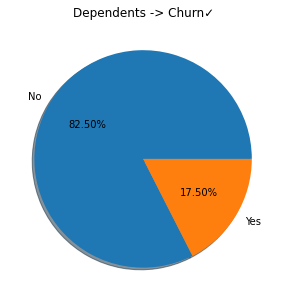

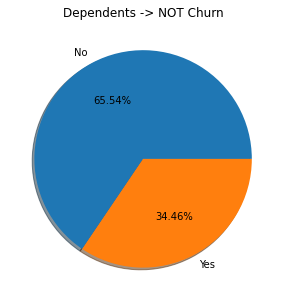

In [ ]:
#Partner Vs Dependents
partner_dependent_crosstab = pd.crosstab(training_df.Partner, training_df.Dependents, margins=True)
print(partner_dependent_crosstab)
pd.crosstab(training_df.Partner, training_df.Dependents, margins=True).plot(kind='barh', color = color_arr)
plt.title("Partner Vs Dependents");
plt.show()

#Partner Vs Churn
partner_crosstab = pd.crosstab(training_df.Partner, training_df.Churn, margins=True)
#print(partner_crosstab)
pd.crosstab(training_df.Partner, training_df.Churn, margins=True).plot(kind='barh', color = color_arr)
plt.title("Partner Vs Churn");
plt.show()

labels5 = training_df["Partner"].unique().tolist() 
labels5_order = [1,0]
labels5 = [labels5[i] for i in labels5_order]
noOfLabels5 = len(labels5) 
arr_percent5 = [None]*noOfLabels5 
arr_percent5b = [None]*noOfLabels5 

for x in range (0,noOfLabels5,1): 
  arr_percent5[x] = round((partner_crosstab.iloc[x,1:-1].sum()/partner_crosstab.iloc[noOfLabels5,1:-1].sum())*100,2)
  arr_percent5b[x] = round((partner_crosstab.iloc[x,0:-2].sum()/partner_crosstab.iloc[noOfLabels5,0:-2].sum())*100,2)

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent5,labels=labels5, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Partner -> Churn\u2713")

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent5b,labels=labels5, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Partner -> NOT Churn")
plt.show()

#Dependents Vs Churn
dependents_crosstab = pd.crosstab(training_df.Dependents, training_df.Churn, margins=True)
#print(dependents_crosstab)
pd.crosstab(training_df.Dependents, training_df.Churn, margins=True).plot(kind='barh', color = color_arr)
plt.title("Dependents Vs Churn");
plt.show()

labels6 = training_df["Dependents"].unique().tolist() 
noOfLabels6 = len(labels6) 
arr_percent6 = [None]*noOfLabels6
arr_percent6b = [None]*noOfLabels6

for x in range (0,noOfLabels5,1): 
  arr_percent6[x] = round((dependents_crosstab.iloc[x,1:-1].sum()/dependents_crosstab.iloc[noOfLabels6,1:-1].sum())*100,2)
  arr_percent6b[x] = round((dependents_crosstab.iloc[x,0:-2].sum()/dependents_crosstab.iloc[noOfLabels6,0:-2].sum())*100,2)

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent6,labels=labels6, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Dependents -> Churn\u2713")

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent6b,labels=labels6, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Dependents -> NOT Churn")
plt.show()

In [ ]:
percent_partner_got_dependents = round((790/977)*100,2)
print('Percent of Partner that had Dependents {0}'.format(percent_partner_got_dependents))
percent_nonpartner_got_dependents = round((187/977)*100, 2)
print('Percent of Non-Partner that had Dependents {0}' .format(percent_nonpartner_got_dependents))

Percent of Partner that had Dependents 80.86
Percent of Non-Partner that had Dependents 19.14


> Since the percentage of partner that had dependents is larger than non-partner, which mean that most partners might be married.



### Phone Service

Churn           No   Yes   All
PhoneService                  
No             160   136   296
Yes           1352  1344  2696
All           1512  1480  2992


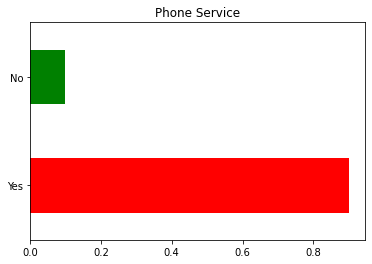

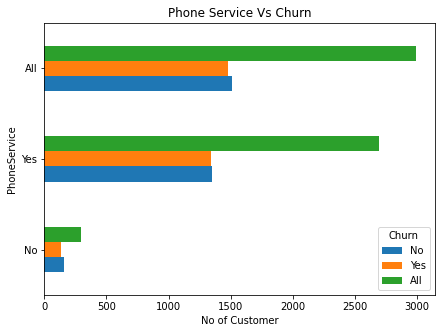

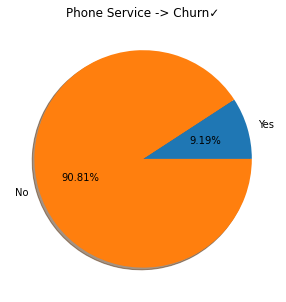

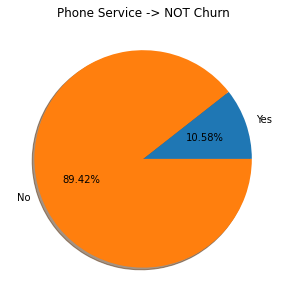

In [ ]:
training_df.PhoneService.value_counts(normalize=True).plot(kind='barh', color = color_arr)
plt.title("Phone Service")

#Phone Service Vs Churn
phone_crosstab = pd.crosstab(training_df.PhoneService, training_df.Churn, margins=True) #create crosstab
print(phone_crosstab)

phone_crosstab.plot(kind='barh', figsize=(7,5)) 
plt.title("Phone Service Vs Churn")
plt.xlabel('No of Customer')

#Create Pie Chart
labels7 = training_df["PhoneService"].unique().tolist() 
noOfLabels7 = len(labels7) 
arr_percent7 = [None]*noOfLabels7
arr_percent7b = [None]*noOfLabels7

for x in range (0,noOfLabels7,1): 
  arr_percent7[x] = round((phone_crosstab.iloc[x,1:-1].sum()/phone_crosstab.iloc[noOfLabels7,1:-1].sum())*100,2)
  arr_percent7b[x] = round((phone_crosstab.iloc[x,0:-2].sum()/phone_crosstab.iloc[noOfLabels7,0:-2].sum())*100,2)

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent7,labels=labels7, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Phone Service -> Churn\u2713")

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent7b,labels=labels7, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Phone Service -> NOT Churn")
plt.show()

###Internet Service

Churn              No   Yes   All
InternetService                  
DSL               565   366   931
Fiber optic       524  1018  1542
No                423    96   519
All              1512  1480  2992


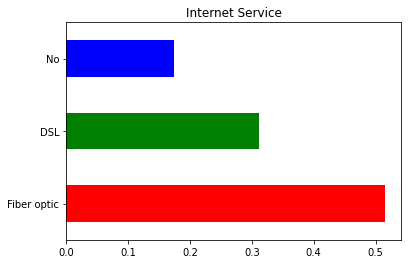

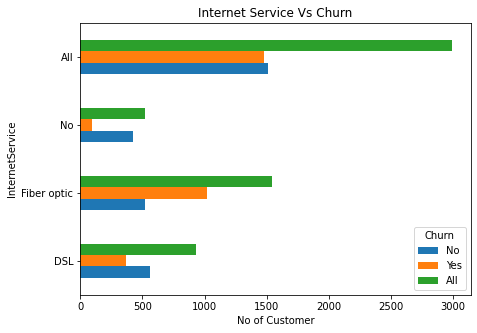

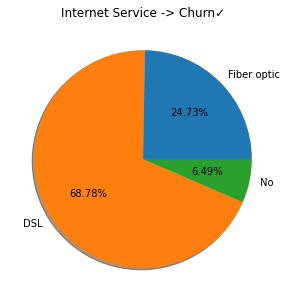

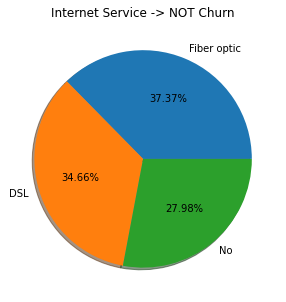

In [ ]:
training_df.InternetService.value_counts(normalize=True).plot(kind='barh', color = color_arr)
plt.title("Internet Service")

#Internet Service Vs Churn
internet_crosstab = pd.crosstab(training_df.InternetService, training_df.Churn, margins=True) #create crosstab
print(internet_crosstab)

internet_crosstab.plot(kind='barh', figsize=(7,5)) 
plt.title("Internet Service Vs Churn")
plt.xlabel('No of Customer')

#Create Pie Chart
labels8 = training_df["InternetService"].unique().tolist() 
noOfLabels8 = len(labels8) 
arr_percent8 = [None]*noOfLabels8
arr_percent8b = [None]*noOfLabels8

for x in range (0,noOfLabels8,1): 
  arr_percent8[x] = round((internet_crosstab.iloc[x,1:-1].sum()/internet_crosstab.iloc[noOfLabels8,1:-1].sum())*100,2)
  arr_percent8b[x] = round((internet_crosstab.iloc[x,0:-2].sum()/internet_crosstab.iloc[noOfLabels8,0:-2].sum())*100,2)

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent8,labels=labels8, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Internet Service -> Churn\u2713")

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent8b,labels=labels8, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Internet Service -> NOT Churn")
plt.show()

###Multiple Lines

Churn            No   Yes   All
MultipleLines                  
No              919   809  1728
Yes             593   671  1264
All            1512  1480  2992


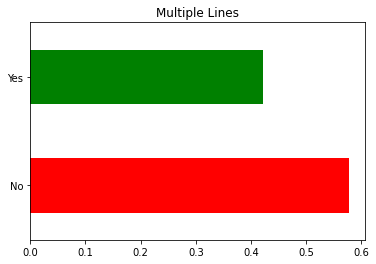

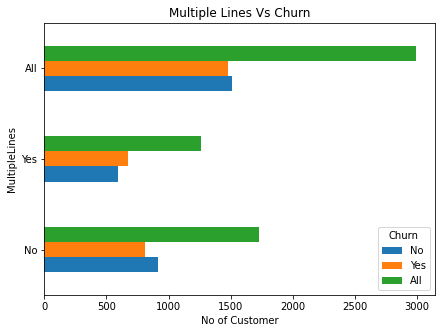

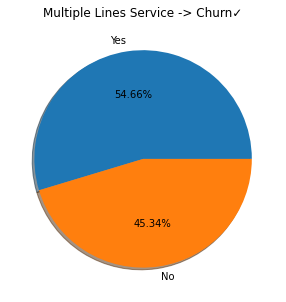

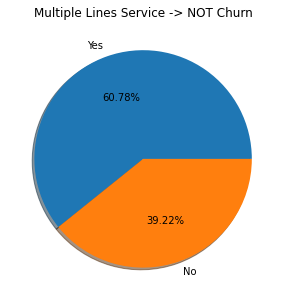

In [ ]:
training_df.MultipleLines.value_counts(normalize=True).plot(kind='barh', color = color_arr)
plt.title("Multiple Lines")

#MultipleLines Vs Churn
multipleLines_crosstab = pd.crosstab(training_df.MultipleLines, training_df.Churn, margins=True) #create crosstab
print(multipleLines_crosstab)

multipleLines_crosstab.plot(kind='barh', figsize=(7,5)) 
plt.title("Multiple Lines Vs Churn")
plt.xlabel('No of Customer')

#Create Pie Chart
labels9 = training_df["MultipleLines"].unique().tolist() 
noOfLabels9 = len(labels9) 
arr_percent9 = [None]*noOfLabels9
arr_percent9b = [None]*noOfLabels9

for x in range (0,noOfLabels9,1): 
  arr_percent9[x] = round((multipleLines_crosstab.iloc[x,1:-1].sum()/multipleLines_crosstab.iloc[noOfLabels9,1:-1].sum())*100,2)
  arr_percent9b[x] = round((multipleLines_crosstab.iloc[x,0:-2].sum()/multipleLines_crosstab.iloc[noOfLabels9,0:-2].sum())*100,2)

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent9,labels=labels9, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Multiple Lines Service -> Churn\u2713")

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent9b,labels=labels9, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Multiple Lines Service -> NOT Churn")
plt.show()

###Paperless Billing

Churn               No   Yes   All
PaperlessBilling                  
No                 692   377  1069
Yes                820  1103  1923
All               1512  1480  2992


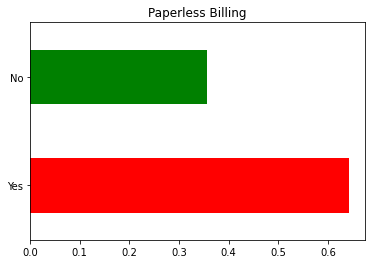

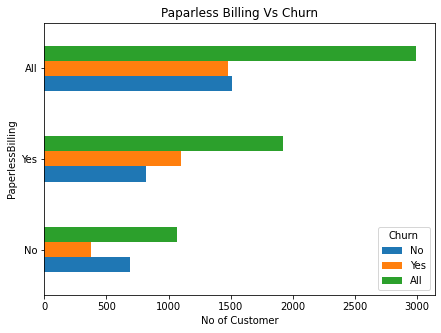

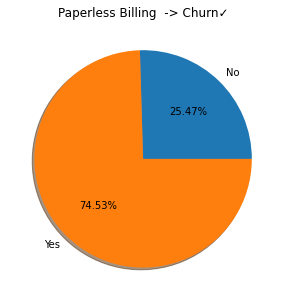

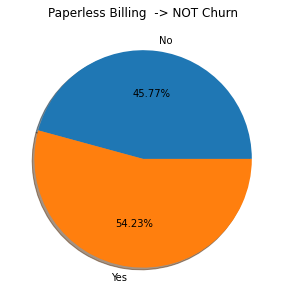

In [ ]:
training_df.PaperlessBilling.value_counts(normalize=True).plot(kind='barh', color = color_arr)
plt.title("Paperless Billing")

#Paperless Billing Vs Churn
paparless_billing_crosstab = pd.crosstab(training_df.PaperlessBilling, training_df.Churn, margins=True) #create crosstab
print(paparless_billing_crosstab)

paparless_billing_crosstab.plot(kind='barh', figsize=(7,5)) 
plt.title("Paparless Billing Vs Churn")
plt.xlabel('No of Customer')

#Create Pie Chart
labels10 = training_df["PaperlessBilling"].unique().tolist() 
labels10_order = [1,0]
labels10 = [labels10[i] for i in labels10_order]
noOfLabels10 = len(labels10) 
arr_percent10 = [None]*noOfLabels10
arr_percent10b = [None]*noOfLabels10

for x in range (0,noOfLabels10,1): 
  arr_percent10[x] = round((paparless_billing_crosstab.iloc[x,1:-1].sum()/paparless_billing_crosstab.iloc[noOfLabels10,1:-1].sum())*100,2)
  arr_percent10b[x] = round((paparless_billing_crosstab.iloc[x,0:-2].sum()/paparless_billing_crosstab.iloc[noOfLabels10,0:-2].sum())*100,2)

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent10,labels=labels10, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Paperless Billing  -> Churn\u2713")

plt.figure(figsize=(5,5)) #set size for pie chart
plt.pie(arr_percent10b,labels=labels10, autopct="%.2f%%",wedgeprops={ "antialiased":True,'linewidth': 1, 'linestyle': 'solid'}, shadow=True)
plt.title("Paperless Billing  -> NOT Churn")
plt.show()

###Monthly Charges



The median of monthly charges that customer churn: 


79.45

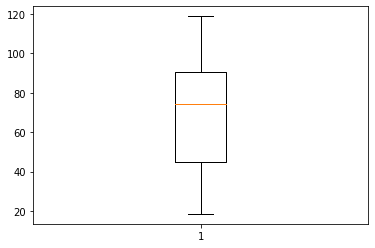

In [ ]:
#Check for outliers
plt.boxplot(training_df.MonthlyCharges)

print("The median of monthly charges that customer churn: ")
training_df.loc[(training_df.Churn == 'Yes'), 'MonthlyCharges'].median()

###Total Charges

The median of total charges that customer churn: 


694.225

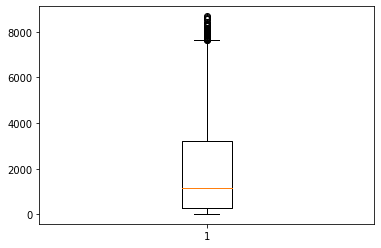

In [ ]:
#Check for outliers
plt.boxplot(training_df.TotalCharges)

print("The median of total charges that customer churn: ")
training_df.loc[(training_df.Churn == 'Yes'), 'TotalCharges'].median()

###Partner Vs Tenure

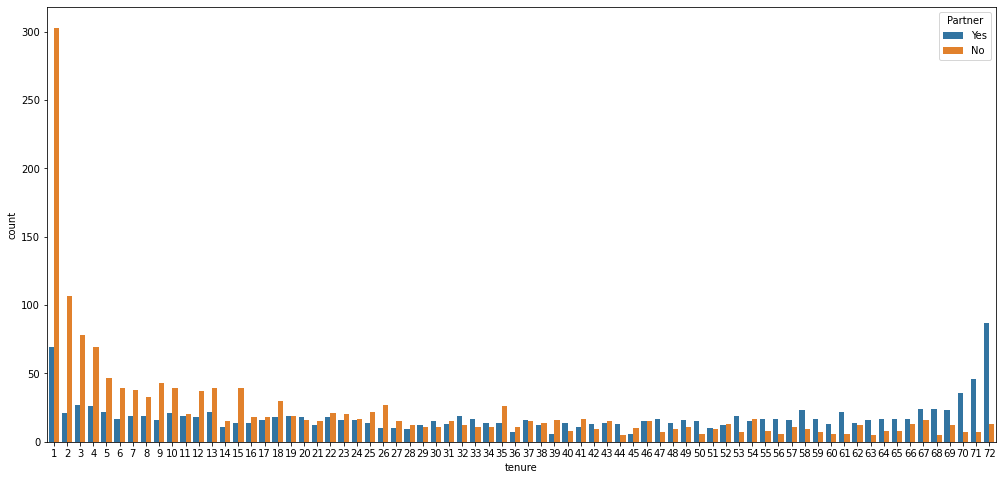

In [17]:
plt.figure(figsize=(17,8))
sns.countplot(x=training_df['tenure'],hue=training_df.Partner)

> Most of the people that were partner stay longer with the company. 

###Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movie 

When Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movie = Churn

In [11]:
training_df.loc[(training_df.Churn == 'Yes'), 'OnlineSecurity'].value_counts(normalize=True)

No     0.846622
Yes    0.153378
Name: OnlineSecurity, dtype: float64

In [12]:
training_df.loc[(training_df.Churn == 'Yes'), 'OnlineBackup'].value_counts(normalize=True)

No     0.721622
Yes    0.278378
Name: OnlineBackup, dtype: float64

In [13]:
training_df.loc[(training_df.Churn == 'Yes'), 'DeviceProtection'].value_counts(normalize=True)

No     0.708784
Yes    0.291216
Name: DeviceProtection, dtype: float64

In [14]:
training_df.loc[(training_df.Churn == 'Yes'), 'TechSupport'].value_counts(normalize=True)

No     0.832432
Yes    0.167568
Name: TechSupport, dtype: float64

In [15]:
training_df.loc[(training_df.Churn == 'Yes'), 'StreamingTV'].value_counts(normalize=True)

No     0.568243
Yes    0.431757
Name: StreamingTV, dtype: float64

In [16]:
training_df.loc[(training_df.Churn == 'Yes'), 'StreamingMovies'].value_counts(normalize=True)

No     0.567568
Yes    0.432432
Name: StreamingMovies, dtype: float64

> As the results from (Online Security, Online Backup, Device Protection, Tech Support), we can see that the customers who left the company didn't use these services. Besides, the results' ratio from StreamingTV and Streaming Movies are almost 5-to-5. Thus, these variables are not so important.

## Data Prepoccessing

In [ ]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_categorized
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure 0-12
1,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure 0-12
2,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Tenure 0-12
3,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Tenure 24-48
4,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Tenure 48-60


In [ ]:
data = data.drop(["customerID","TotalCharges"], axis =1)

data["InternetService"].replace(['DSL','Fiber optic', 'No'],['DSL','FiberOptic', 'No'], inplace=True)
data["Contract"].replace(['Month-to-month','One year','Two year'],['Month-to-month','OneYear','TwoYear'], inplace=True)
data["PaymentMethod"].replace(['Mailed check','Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)'],['MailedCheck','ElectronicCheck', 'BankTransfer', 'CreditCard'], inplace=True)

#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])

#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )
# pd.set_option('display.max_rows', data.shape[0]+1)

scaler = MinMaxScaler()
data[["tenure","MonthlyCharges"]] = scaler.fit_transform(data[["tenure","MonthlyCharges"]])

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,InternetService_DSL,InternetService_FiberOptic,InternetService_No,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,tenure_categorized_Tenure 0-12,tenure_categorized_Tenure 12-24,tenure_categorized_Tenure 24-48,tenure_categorized_Tenure 48-60,tenure_categorized_Tenure gt>60
0,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.352295,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.520459,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0.098592,1,1,0,0,1,0,1,1,1,0.809381,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,0,0,1,0,0.380282,1,1,0,0,1,1,1,1,1,0.860778,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0.676056,1,1,0,1,1,0,1,1,1,0.849800,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,1,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.661178,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3736,0,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.844810,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
3737,0,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.110279,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3738,1,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.557385,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0


In [ ]:
#transposed summary statistics of variable 
X = [x for x in data.columns if x not in target_col]
X = data[X]
y = data[target_col]
print(data.shape)
data.describe().transpose()

(3740, 31)


,count,mean,std,min,25%,50%,75%,max
gender,3740.0,0.499198,0.500066,0.0,0.000000,0.000000,1.000000,1.0
SeniorCitizen,3740.0,0.194385,0.395779,0.0,0.000000,0.000000,0.000000,1.0
Partner,3740.0,0.446524,0.497199,0.0,0.000000,0.000000,1.000000,1.0
Dependents,3740.0,0.261230,0.439364,0.0,0.000000,0.000000,1.000000,1.0
tenure,3740.0,0.380948,0.338009,0.0,0.056338,0.295775,0.676056,1.0
PhoneService,3740.0,0.900000,0.300040,0.0,1.000000,1.000000,1.000000,1.0
MultipleLines,3740.0,0.427005,0.494709,0.0,0.000000,0.000000,1.000000,1.0
OnlineSecurity,3740.0,0.244652,0.429938,0.0,0.000000,0.000000,0.000000,1.0
OnlineBackup,3740.0,0.327005,0.469182,0.0,0.000000,0.000000,1.000000,1.0
DeviceProtection,3740.0,0.325668,0.468687,0.0,0.000000,0.000000,1.000000,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [ ]:
#Univariate selection
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X_train,y_train)

dataScore = pd.DataFrame(fit.scores_)
dataColumns = pd.DataFrame(X_train.columns)

featureScore = pd.concat([dataColumns,dataScore],axis=1)
featureScore.columns = ['Characteristic','Score']
featureScore

print(featureScore.nlargest(19,'Score'))


                     Characteristic       Score
20                 Contract_TwoYear  356.800941
18          Contract_Month-to-month  233.750561
25   tenure_categorized_Tenure 0-12  233.300917
17               InternetService_No  199.116393
29  tenure_categorized_Tenure gt>60  195.371133
23    PaymentMethod_ElectronicCheck  180.848521
16       InternetService_FiberOptic  169.021967
4                            tenure  152.603529
19                 Contract_OneYear  121.638867
7                    OnlineSecurity   89.208250
3                        Dependents   82.499509
10                      TechSupport   79.602688
1                     SeniorCitizen   60.173037
22         PaymentMethod_CreditCard   53.244788
21       PaymentMethod_BankTransfer   50.394707
13                 PaperlessBilling   47.926870
2                           Partner   46.320420
28  tenure_categorized_Tenure 48-60   42.411217
15              InternetService_DSL   38.390184


### Correlation Matrix

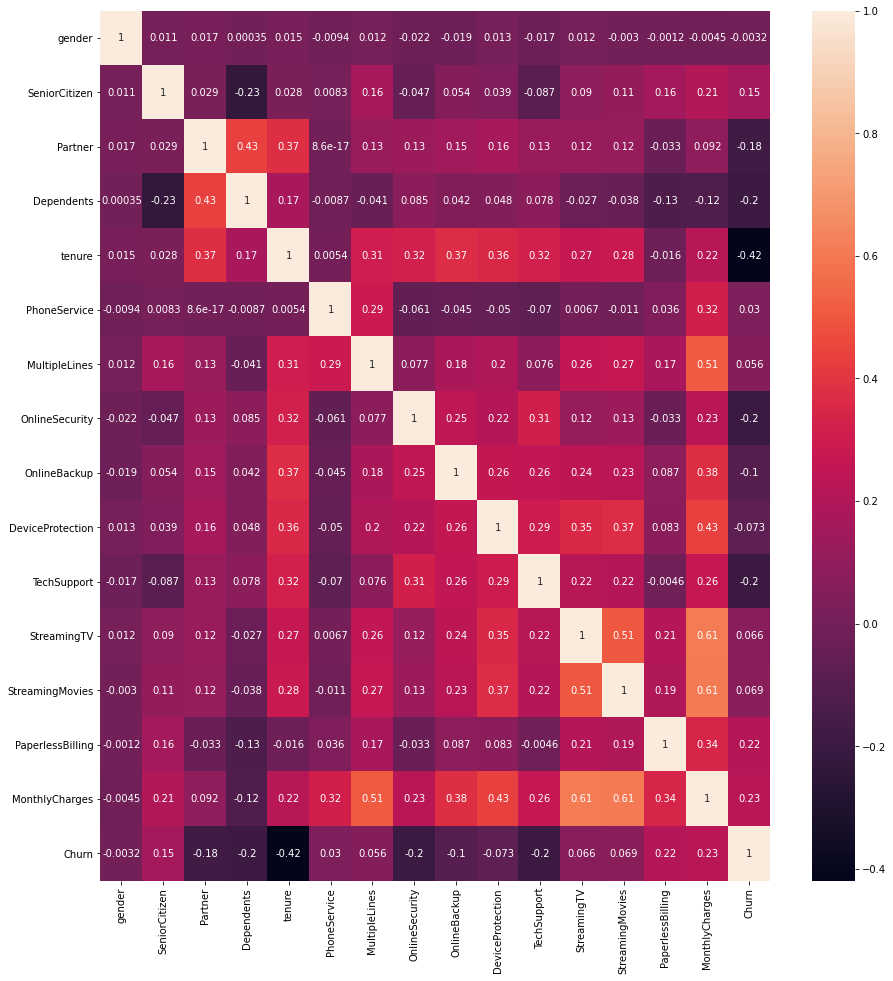

In [ ]:
df_seaborn = data [['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharges','Churn']]

plt.figure(figsize=(15, 16))
sns.heatmap(df_seaborn.corr(),xticklabels=df_seaborn.corr().columns.values,yticklabels=df_seaborn.corr().columns.values,annot=True)
# sns.heatmap(data.corr(),xticklabels=data.corr().columns.values,yticklabels=data.corr().columns.values,annot=True)

##Data Modelling

In [ ]:
X = data.loc[:,['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MonthlyCharges', 'InternetService_DSL',	'InternetService_FiberOptic', 'InternetService_No'	,'Contract_Month-to-month'	,'Contract_OneYear'	,'Contract_TwoYear'	,'PaymentMethod_BankTransfer'	,'PaymentMethod_CreditCard'	,'PaymentMethod_ElectronicCheck'	,'PaymentMethod_MailedCheck']]
y = data.loc[:,'Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,InternetService_DSL,InternetService_FiberOptic,InternetService_No,Contract_Month-to-month,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,tenure_categorized_Tenure 0-12,tenure_categorized_Tenure 12-24,tenure_categorized_Tenure 24-48,tenure_categorized_Tenure 48-60,tenure_categorized_Tenure gt>60
0,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.352295,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.520459,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0.098592,1,1,0,0,1,0,1,1,1,0.809381,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,0,0,1,0,0.380282,1,1,0,0,1,1,1,1,1,0.860778,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0.676056,1,1,0,1,1,0,1,1,1,0.849800,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
import plotly.graph_objs as go#visualization
import plotly.subplots as tls#visualization

def featureImportance(algorithm,training_x,training_y,cols,cf) :
    
    # #model
    algorithm.fit(training_x,training_y)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)

    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .8,color = "black")))
    
    #subplots
    fig = tls.make_subplots()
    fig.append_trace(trace4,1,1)
    fig['layout'].update(showlegend=False,title="Feature importance" ,
                         autosize = False,height=600,width=600,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)')

    py.iplot(fig)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



###ANN

In [ ]:
#Building & Evaluating the Model
#hidden layer set to three layers
#activation  function used is relu & adam as solver for weight optimization
#Fits the model to the training data
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000,random_state=200)

#Use trained model to generate predictions

mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

#Evaluate model performance on test data
print("                            ANN")
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

                            ANN
[[270  89]
 [ 89 300]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       359
           1       0.77      0.77      0.77       389

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



###Logistic Regression

In [ ]:
#Logistic Regression
logistic = LogisticRegression()
logistic.fit(X,y)

model = LogisticRegression(random_state=100)
parameters = [{'C': list(np.arange(1000, 2000, 200)),
               'fit_intercept': [True, False],
               'tol' : [1e-5,1e-4],
               'solver' : ['newton-cg','lbfgs']}]
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)

y_pred= logistic.predict(X_test)
print("                      Logistic Regression")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

featureImportance(logistic,X_train,y_train,X_train.columns,"coefficients")


                      Logistic Regression
[[276  83]
 [ 74 315]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       359
           1       0.79      0.81      0.80       389

    accuracy                           0.79       748
   macro avg       0.79      0.79      0.79       748
weighted avg       0.79      0.79      0.79       748



###KNN

                               KNN
[[246 113]
 [ 46 343]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       359
           1       0.75      0.88      0.81       389

    accuracy                           0.79       748
   macro avg       0.80      0.78      0.78       748
weighted avg       0.80      0.79      0.78       748



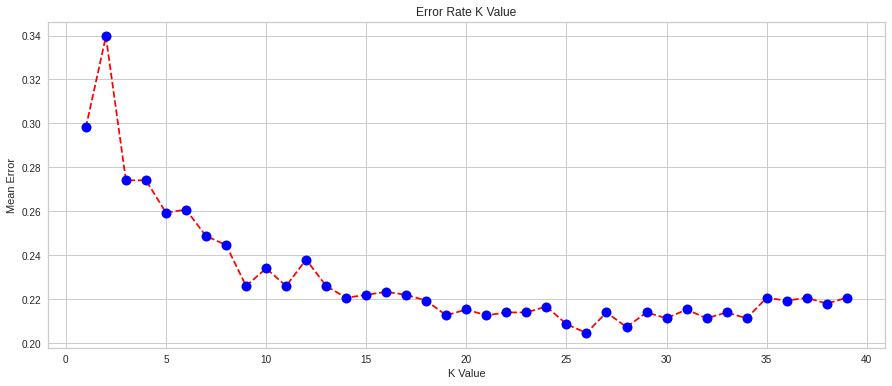

In [ ]:
#KNN
classifier = KNeighborsClassifier(n_neighbors=100)
classifier.fit(X_train, y_train)
# classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("                               KNN")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


###Gaussian NB

In [ ]:
#NaiveBayes
nb = GaussianNB()
nb.fit(X,y) #using fit method and passing parameters

model = LogisticRegression(random_state=100)
parameters = [{'C': list(np.arange(1000, 2000, 200)),
               'fit_intercept': [True, False],
               'tol' : [1e-5,1e-4],
               'solver' : ['newton-cg','lbfgs']}]
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)
y_pred = nb.predict(X_test) #pass x_test as a parameter to get output as y_pred
print("                          Naive Bayes")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



                          Naive Bayes
[[260  99]
 [ 64 325]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       359
           1       0.77      0.84      0.80       389

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



###SVM

In [ ]:
#SVM
svmModel = svm.SVC(gamma=0.001, C=100,random_state=100,probability=True,kernel = 'linear')
svmModel.fit(X_train,y_train)

predictions = svmModel.predict(X_test)
print("                               SVM")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,predictions))

featureImportance(svmModel,X_train,y_train,X_train.columns,"coefficients")

                               SVM
[[260  99]
 [ 64 325]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       359
           1       0.74      0.85      0.79       389

    accuracy                           0.76       748
   macro avg       0.77      0.76      0.76       748
weighted avg       0.77      0.76      0.76       748



###Decision Tree

                        Decision Tree
[[267  92]
 [ 74 315]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       359
           1       0.77      0.81      0.79       389

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



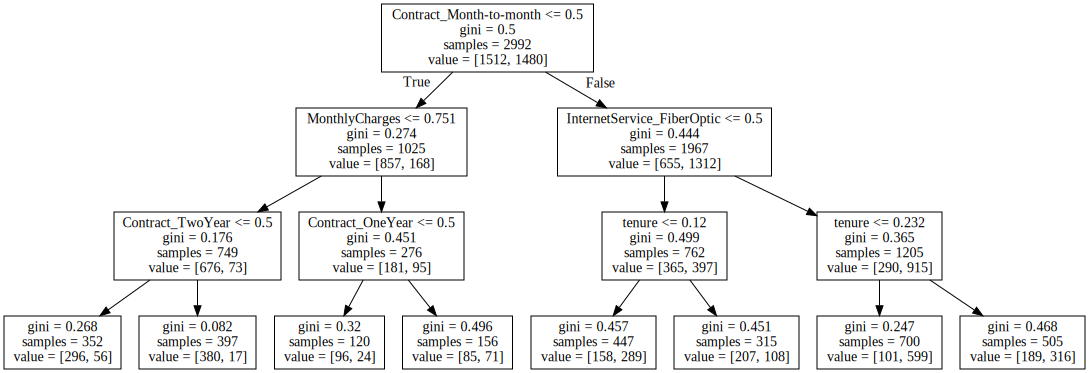

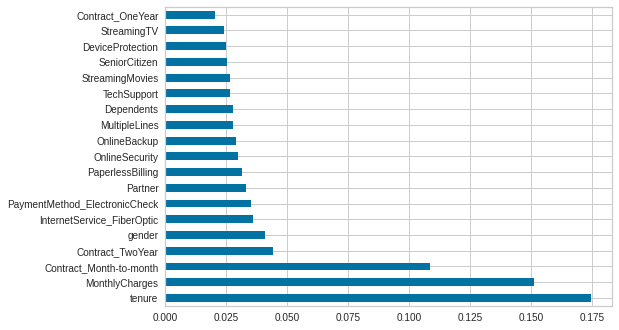

In [ ]:
#Decision Tree
#Feature importance
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show

X_tree = data.loc[:,['tenure','MonthlyCharges']]
y_tree = data.loc[:,'Churn']
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.20, random_state=20)

import graphviz
from sklearn import tree
decision_trees = tree.DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=3,min_samples_leaf=2)
decision_trees.fit(X_train_tree,y_train_tree)
predictions = decision_trees.predict(X_test)

print("                        Decision Tree")
print(confusion_matrix(y_test_tree, predictions))
print(classification_report(y_test_tree,predictions))
dot_data = tree.export_graphviz(decision_trees,feature_names=X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

##Model Performance

In [ ]:
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
  
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],   
                      })
    return df

#outputs for every model
ann_model = model_report(mlp,X_train,X_test,y_train,y_test,
                      "Artificial Neural Network")
logistic_model = model_report(logistic,X_train,X_test,y_train,y_test,
                      "Logistic Regression")
knn_model = model_report(knn,X_train,X_test,y_train,y_test,
                      "KNN Classifier")
nb_model = model_report(nb,X_train,X_test,y_train,y_test,
                      "Naive Bayes")
svm_model = model_report(svmModel,X_train,X_test,y_train,y_test,
                       "Support Vector Machine")

decision_tree_model = model_report(decision_trees,X_train_tree,X_test_tree,y_train_tree,y_test_tree,
                      "Decision Tree")

#concat all models
model_performances = pd.concat([ann_model,logistic_model,knn_model,nb_model,svm_model,decision_tree_model],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

###Confusion Matrics for All Models


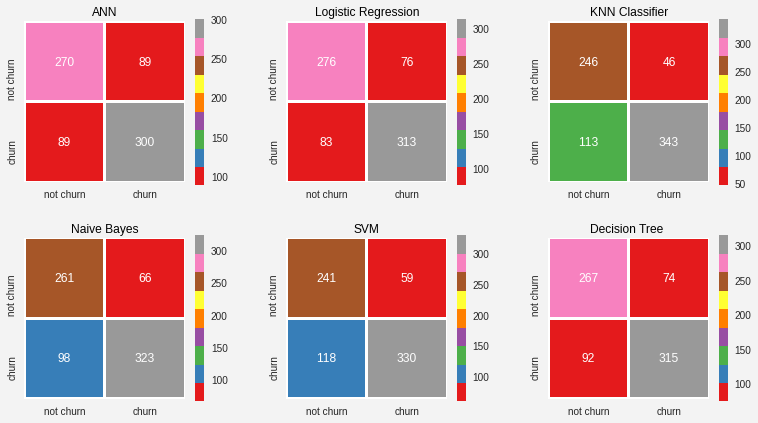

In [ ]:
lst    = [mlp,logistic,classifier,nb,svmModel,decision_trees]

length = len(lst)

mods   = ['ANN','Logistic Regression', 'KNN Classifier',
          'Naive Bayes','SVM' , 'Decision Tree ']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions,y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "black")
    plt.subplots_adjust(wspace = .3,hspace = .3)

###ROC Curve for All Models

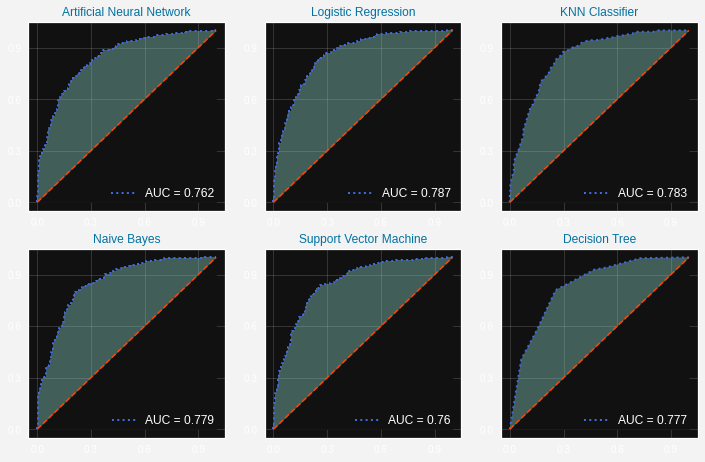

In [ ]:
lst    = [mlp,logistic,classifier,nb,svmModel,decision_trees]

length = len(lst)

mods   = ['Artificial Neural Network','Logistic Regression',
          'KNN Classifier',"Naive Bayes",'Support Vector Machine',
          'Decision Tree']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

###Precision Recall Curve for All Models 

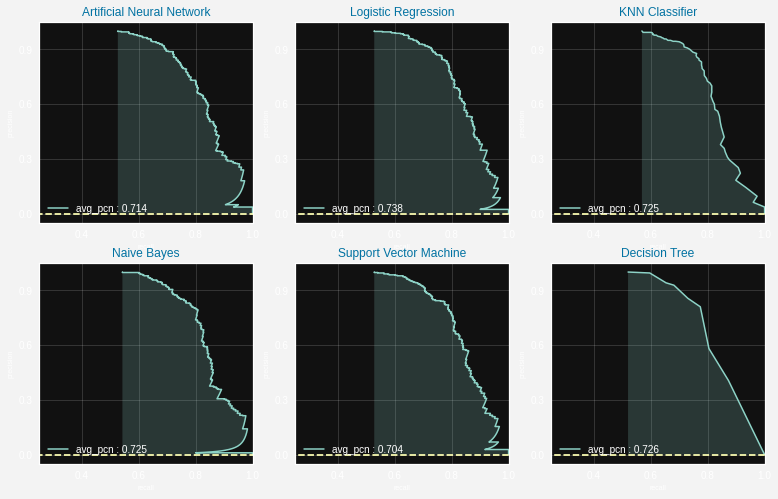

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

lst    = [mlp,logistic,classifier,nb,svmModel,decision_trees]

length = len(lst)

mods   = ['Artificial Neural Network','Logistic Regression',
          'KNN Classifier',"Naive Bayes",'Support Vector Machine',
          'Decision Tree']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(y_test,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))

##Deployment

Our project is to analyse telecom customer churn. Dataset implemented is from the Kaggle website. After implementing our dataset we carry out data preprocessing which we use 80% of the dataset to train the machine while remaining 20% to test the results. Methods used during our data preprocessing include Min Max Scaler and Label Encoder. Feature importance is also implemented  to assign a score to input features based on how useful they are at predicting a target variable. We found out that the tenure and monthly charges factor is the highest contribution towards customer churn. In this case, as we are doing telecom customer churn, we are most concerned about the recall of the models. The models implemented include Artificial Neural Network, Logistic Regression, K Nearest Neighbors Algorithm, Gaussian Naive Bayes, Support Vector Machine and Decision Tree.

**BEST MODEL TO IMPLEMENT : KNN (0.78 Accuracy, 0.86 Recall, 0.75 Precision,0.80 F1-Score)**

>Monthly charges

Monthly charges factor is the main contributing aspect towards customer churn. Customers aim for lower cost with better services. Unfortunately, even if consumers demand more bandwidth, they are not willing to pay higher charges for the upgraded service. Revenue growth is diminishing for many services as it is no longer tracked directly by the rise of traffic volume . Thus, carriers must move fast to keep up with consumer's expectations. This is due to customers find it easier to switch carriers to keep pace with their needs on services.

Strategy for deployment : 

Upgrade network performance to reduce churn and retain subscribers.Speed and quality of network deployment are now key differentiators between the company and competitors. It is critical that new technology and capacity to be deployed quickly and efficiently which not only to avoid customer churn but to quickly capture available revenue.
Effectively managing network growth programs at the aspect of speed and scale has thus become vitally important to a carrier’s long-term viability in the market.

>Tenure

We realised a fascinating fact that the percentage of churn decreases as tenure increases. In telecom business tenure means how long a customer is using the services provided by the company. Tenure has a huge impact on churning according to the analysis which is driven by the data given by the company. 

Strategies for deployment:

We recommend the managerial team to target customers, who have already selected fiber internet with month to month contracts, with incentives like promotions or bundles in order to keep the customer as customers who chose fiber optic is the major contribution to churn.






##Conclusion


The prediction and management of customer churn has became a more vital task due to liberalization of cellular market. Timely prediction of loyal customers that intended to leave the company can help identification and subject to the proactive action in order to retain them. To determine a promising solution for maintaining strong customer baseline, telecom churn prediction has taken a shape of modern day research problem to issue an early warning system for switching over subscribers. In this project, we have tested 6 classification models, trained and optimized them which includes Artificial Neural Network (ANN), Logistic Regression, KNN Classifier, Gaussian Naive Bayes, Support Vector Machine and Decision Tree. KNN Classifier generally works well compared to other classification and has performed better than the rest. Since the business requirement is to predict the churn of customer, so both precision and recall score are important. Thus, F1-score will be a good indicator to know which model is the best for the prediction because F1-score is the balance between precision and recall rates trade-off. In conclusion business can focus on this list of features to understand whether a customer will likely to churn or not. With the existing consumer insights through data, companies can predict customers’ possible needs and issues, define proper strategies and solutions against them, meet their expectations and retain their business. Based on the predictive analysis and modeling, businesses can focus their attention with targeted approach by segmenting and offering them customized solutions. Analyzing how and when the churn is happening in customer’s lifecycle with the services will allow the company to come up with more preemptive measures.

> Advantages

To show the eﬀectiveness of our study in terms of precision, recall, accuracy, and f-measure. Future studies might be able to provide empirical results on the balanced dataset with multiple base-classiﬁer. Another future direction can be to test more comprehensive study with other types of models would oﬀer the possibility to compare our results and eventually help to evaluate this eﬀect statistically. Furthermore, since our proposed model predicts level of certainty that leads to expected level of accuracy. This can be used to select good cases for training the classiﬁer eﬃciently and more accurately. This can also be used to predict outliers in training data that can have negative eﬀect on the classiﬁcation. In the future, we can try to separate the whole dataset in monthly or weekly data and predict for next month or week churned customers. We can use more advance machine learning techniques by combining two or more algorithms to improve the overall prediction rate.

> Weakness/Limitation

Based on the distribution of the customers that churn vs not churn, we see that the data is impartial. This means we can’t just rely on accuracy metric scores for the prediction models. 


##References

##Appendix

Source of Data:
https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction/notebook